In [41]:
quit()

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("white")
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, roc_curve, confusion_matrix

# Classification of the format1_dataset, and format1_dataset_fft
We apply several methods

# Set up datasets

In [21]:
data = pd.read_csv("time_series_data_v1.csv")
data_fft = pd.read_csv("time_series_data_v1_fft.csv")

In [184]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,7500
0,0,-1.919012,-1.919012,-1.919012,-1.919012,37.580988,37.179754,37.580988,77.580988,77.080988,...,10.779934,12.404934,14.404934,15.904934,16.404934,17.404934,18.904934,18.654934,17.904934,0.0
1,1,-2.056393,-2.056393,-2.056393,-2.056393,37.456107,37.443607,37.443607,76.943607,76.943607,...,-1.243339,-0.743339,-0.243339,0.756661,1.256661,2.256661,3.756661,4.256661,4.756661,0.0
2,2,-1.527552,-1.527552,-1.527552,-1.527552,37.972448,37.571214,37.972448,77.972448,77.472448,...,-38.638512,-39.538512,-40.538512,-40.538512,-39.438512,-38.538512,-37.038512,-33.038512,-32.913512,0.0
3,3,-1.683246,-1.683246,-1.683246,-1.683246,37.816754,37.415520,37.816754,77.816754,77.316754,...,5.155963,5.405963,5.905963,6.572629,6.655963,7.405963,8.405963,8.905963,8.905963,0.0
4,4,-1.496040,-1.496040,-1.496040,-1.496040,38.003960,37.602726,38.003960,78.003960,77.503960,...,-2.816436,-2.816436,-2.816436,-2.316436,-1.816436,-1.983103,-1.816436,-1.816436,-2.316436,0.0


In [185]:
data_fft.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,7500
0,0,8.810730e-13,1754.620136,1111.232507,877.424567,1612.482093,1496.972754,1290.561420,819.749901,1041.156190,...,1667.542984,911.635367,2267.761854,1798.143874,1976.902999,2528.165282,1721.001574,3034.219976,1726.239727,0.0
1,1,5.258016e-12,1717.776454,1575.638489,1551.712801,1049.344949,1242.986193,1173.008962,1595.635646,807.680360,...,857.542235,1317.682629,753.778000,2089.817295,926.026290,955.332643,2225.841039,881.140039,1866.132179,0.0
2,2,3.666401e-12,1222.182666,1160.233433,1075.590271,1604.629377,1295.074248,1460.742239,2711.975076,720.778185,...,475.877793,561.915265,1011.705599,921.503744,831.159064,900.202411,903.285798,863.718676,977.430996,0.0
3,3,3.765876e-12,1402.132765,1482.460656,1269.357953,1423.200436,1098.530975,1201.729242,1233.002046,1588.659021,...,1567.586264,1529.488217,1087.482628,1626.073792,1114.458183,1633.220659,1771.324525,1464.746585,1276.345344,0.0
4,4,2.444267e-12,3150.845355,1139.146049,1288.776028,1391.246330,1552.294539,998.176271,762.994498,1182.613670,...,1006.640784,2071.525278,1989.091452,1410.119838,2846.517129,3822.363668,3203.469711,1959.778941,1199.812164,0.0


In [22]:
X = data.iloc[:,1:-1].to_numpy()
y = data.iloc[:,-1].to_numpy()
y[y !=0] = 1
X_fft = data_fft.iloc[:,1:-1].to_numpy()
y_fft = data_fft.iloc[:,-1].to_numpy()
y_fft[y_fft !=0] = 1

X = X[:,-1940:]
X_fft = X_fft[:,-1940:]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=111,
                                                    stratify=y)

X_fft_train, X_fft_test, y_fft_train, y_fft_test = train_test_split(X_fft, y_fft, 
                                                    test_size=0.3, 
                                                    random_state=111,
                                                    stratify=y_fft)

# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

0.7328571428571429
0.897196261682243
0.5378151260504201


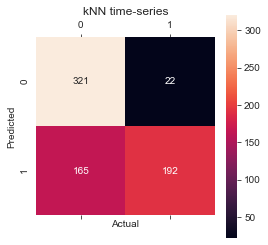

In [55]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print( accuracy_score(y_test,y_pred))
print( precision_score(y_test,y_pred))
print( recall_score(y_test,y_pred))


confmat = confusion_matrix(y_test,y_pred)
plt.matshow(confmat)
sn.heatmap(confmat,annot=True, annot_kws={"size":10}, fmt='d')
plt.title("kNN time-series")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.savefig("Long_lead_kNN time-series")

0.79
0.8409090909090909
0.7254901960784313


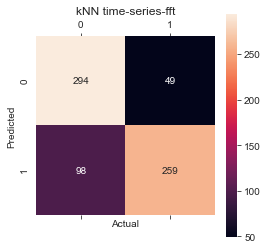

In [56]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_fft_train,y_fft_train)
y_fft_pred = knn.predict(X_fft_test)
print( accuracy_score(y_fft_test,y_fft_pred))
print( precision_score(y_fft_test,y_fft_pred))
print( recall_score(y_fft_test,y_fft_pred))

confmat = confusion_matrix(y_fft_test,y_fft_pred)
plt.matshow(confmat)
sn.heatmap(confmat,annot=True, annot_kws={"size":10}, fmt='d')
plt.title("kNN time-series-fft")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.savefig("Long_lead_kNN time-series-fft")

# Random Forest

0.8342857142857143
0.8247978436657682
0.8571428571428571


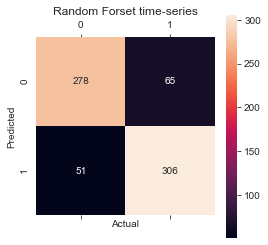

In [57]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()#n_estimators=1000,max_samples=800,max_depth = 100, random_state=614)

forest_clf.fit(X_train,y_train)
y_pred = forest_clf.predict(X_test)
print( accuracy_score(y_test,y_pred))
print( precision_score(y_test,y_pred))
print( recall_score(y_test,y_pred))

confmat = confusion_matrix(y_test,y_pred)
plt.matshow(confmat)
sn.heatmap(confmat,annot=True, annot_kws={"size":10}, fmt='d')
plt.title("Random Forset time-series")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.savefig("Long_lead_Random Forset time-series")

0.8571428571428571
0.8724637681159421
0.8431372549019608


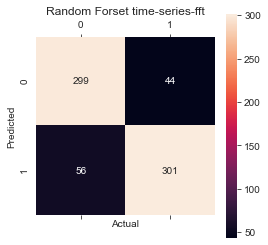

In [58]:
forest_clf = RandomForestClassifier()#n_estimators=1000,max_samples=800,max_depth = 100, random_state=614)

forest_clf.fit(X_fft_train,y_fft_train)

y_fft_pred = forest_clf.predict(X_fft_test)
print( accuracy_score(y_fft_test,y_fft_pred))
print( precision_score(y_fft_test,y_fft_pred))
print( recall_score(y_fft_test,y_fft_pred))

confmat = confusion_matrix(y_fft_test,y_fft_pred)
plt.matshow(confmat)
sn.heatmap(confmat,annot=True, annot_kws={"size":10}, fmt='d')
plt.title("Random Forset time-series-fft")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.savefig("Long_lead_Random Forset time-series-fft")

# DNN

In [44]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical

In [57]:
model = models.Sequential()

In [58]:
model.add(layers.Dense(16, activation='relu', input_shape=(1940,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 16)                31056     
_________________________________________________________________
dense_60 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_61 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_62 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_63 (Dense)             (None, 2)                 34        
Total params: 33,218
Trainable params: 33,218
Non-trainable params: 0
_________________________________________________________________


In [59]:
# we compile the network like so
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [60]:
## I now fit the model, and store the training history
## I use 100 epochs and a batch_size of 512
history = model.fit(X_train,
                        to_categorical(y_train),
                        epochs = 100,
                        batch_size = 400,
                        validation_data=(X_test,to_categorical(y_test)))

Epoch 1/100
5/5 [==============================] - 1s 114ms/step - loss: 1.1524 - accuracy: 0.5129 - val_loss: 0.8466 - val_accuracy: 0.5643
Epoch 2/100
5/5 [==============================] - 0s 64ms/step - loss: 0.5970 - accuracy: 0.6788 - val_loss: 0.7218 - val_accuracy: 0.6057
Epoch 3/100
5/5 [==============================] - 0s 36ms/step - loss: 0.4807 - accuracy: 0.7614 - val_loss: 0.6756 - val_accuracy: 0.6471
Epoch 4/100
5/5 [==============================] - 0s 40ms/step - loss: 0.4000 - accuracy: 0.8287 - val_loss: 0.6494 - val_accuracy: 0.6643
Epoch 5/100
5/5 [==============================] - 0s 63ms/step - loss: 0.3483 - accuracy: 0.8691 - val_loss: 0.6351 - val_accuracy: 0.6943
Epoch 6/100
5/5 [==============================] - 0s 74ms/step - loss: 0.3060 - accuracy: 0.8963 - val_loss: 0.6325 - val_accuracy: 0.6871
Epoch 7/100
5/5 [==============================] - 0s 50ms/step - loss: 0.2705 - accuracy: 0.9037 - val_loss: 0.6375 - val_accuracy: 0.7071
Epoch 8/100
5/5 [==

In [29]:
history_dict = history.history

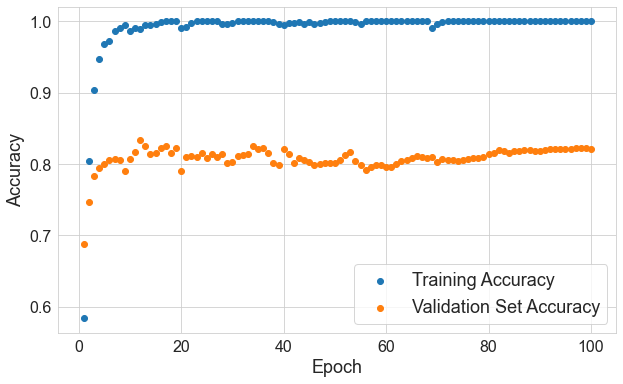

In [30]:
set_style("whitegrid")

plt.figure(figsize = (10,6))

plt.scatter(range(1,101), history_dict['accuracy'], label = "Training Accuracy")
plt.scatter(range(1,101), history_dict['val_accuracy'], label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

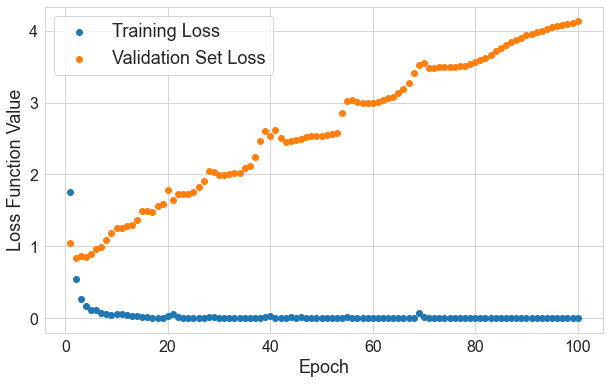

In [31]:
plt.figure(figsize = (10,6))

plt.scatter(range(1,101), history_dict['loss'], label = "Training Loss")
plt.scatter(range(1,101), history_dict['val_loss'], label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss Function Value", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

In [32]:
fpr,tpr,thresholds=roc_curve(y_test,model.predict(X_test)[:,1])

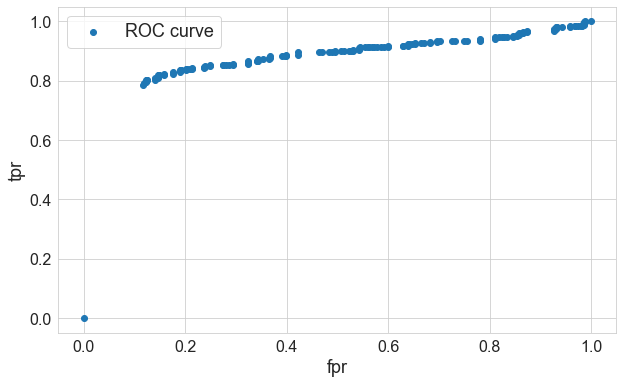

In [33]:
plt.figure(figsize = (10,6))

plt.scatter(fpr, tpr ,label = "ROC curve")

plt.xlabel("fpr", fontsize=18)
plt.ylabel("tpr", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

# DNN for fft data

In [97]:
model_fft = models.Sequential()
model_fft.add(layers.Dense(64, activation='relu', input_shape=(1940,)))
model_fft.add(layers.Dense(64, activation='relu'))
model_fft.add(layers.Dense(32, activation='relu'))
model_fft.add(layers.Dense(2, activation='softmax'))
model_fft.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 64)                124224    
_________________________________________________________________
dense_123 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_124 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_125 (Dense)            (None, 2)                 66        
Total params: 130,530
Trainable params: 130,530
Non-trainable params: 0
_________________________________________________________________


In [98]:
# we compile the network like so
model_fft.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [99]:
history_fft = model_fft.fit(X_fft_train,
                        to_categorical(y_fft_train),
                        epochs = 150,
                        batch_size = 250,
                        validation_data=(X_fft_test,to_categorical(y_fft_test)))
history_fft_dict = history_fft.history

Epoch 1/150
7/7 [==============================] - 1s 75ms/step - loss: 96.6923 - accuracy: 0.4854 - val_loss: 35.8809 - val_accuracy: 0.5071
Epoch 2/150
7/7 [==============================] - 0s 55ms/step - loss: 28.6141 - accuracy: 0.5648 - val_loss: 22.8140 - val_accuracy: 0.5700
Epoch 3/150
7/7 [==============================] - 0s 43ms/step - loss: 18.8313 - accuracy: 0.5936 - val_loss: 14.7310 - val_accuracy: 0.6043
Epoch 4/150
7/7 [==============================] - 0s 38ms/step - loss: 13.0890 - accuracy: 0.6188 - val_loss: 11.7937 - val_accuracy: 0.6186
Epoch 5/150
7/7 [==============================] - 0s 37ms/step - loss: 11.2396 - accuracy: 0.6389 - val_loss: 10.6772 - val_accuracy: 0.6271
Epoch 6/150
7/7 [==============================] - 0s 37ms/step - loss: 9.0075 - accuracy: 0.6605 - val_loss: 10.1476 - val_accuracy: 0.6243
Epoch 7/150
7/7 [==============================] - 0s 30ms/step - loss: 8.4981 - accuracy: 0.6592 - val_loss: 8.0015 - val_accuracy: 0.6586
Epoch 8/1

7/7 [==============================] - 0s 55ms/step - loss: 0.0267 - accuracy: 0.9914 - val_loss: 2.7059 - val_accuracy: 0.8243
Epoch 60/150
7/7 [==============================] - 0s 62ms/step - loss: 0.0205 - accuracy: 0.9948 - val_loss: 2.7131 - val_accuracy: 0.8214
Epoch 61/150
7/7 [==============================] - 0s 74ms/step - loss: 0.0163 - accuracy: 0.9961 - val_loss: 2.7067 - val_accuracy: 0.8271
Epoch 62/150
7/7 [==============================] - 0s 44ms/step - loss: 0.0115 - accuracy: 0.9977 - val_loss: 2.7320 - val_accuracy: 0.8300
Epoch 63/150
7/7 [==============================] - 0s 63ms/step - loss: 0.0119 - accuracy: 0.9973 - val_loss: 2.7586 - val_accuracy: 0.8243
Epoch 64/150
7/7 [==============================] - 0s 48ms/step - loss: 0.0178 - accuracy: 0.9948 - val_loss: 2.7376 - val_accuracy: 0.8357
Epoch 65/150
7/7 [==============================] - 0s 32ms/step - loss: 0.0104 - accuracy: 0.9976 - val_loss: 2.7257 - val_accuracy: 0.8343
Epoch 66/150
7/7 [========

Epoch 117/150
7/7 [==============================] - 0s 50ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.7136 - val_accuracy: 0.8357
Epoch 118/150
7/7 [==============================] - 0s 56ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.7177 - val_accuracy: 0.8371
Epoch 119/150
7/7 [==============================] - 0s 52ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.7164 - val_accuracy: 0.8343
Epoch 120/150
7/7 [==============================] - 0s 37ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.7153 - val_accuracy: 0.8329
Epoch 121/150
7/7 [==============================] - 0s 44ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.7166 - val_accuracy: 0.8329
Epoch 122/150
7/7 [==============================] - 0s 52ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.7179 - val_accuracy: 0.8371
Epoch 123/150
7/7 [==============================] - 0s 51ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.7206 - val_accuracy: 0.8371
Epoch 

# DNN for fft data

In [20]:
model_fft = models.Sequential()
model_fft.add(layers.Dense(512, activation='relu', input_shape=(1940,)))
model_fft.add(layers.Dense(512, activation='relu'))
model_fft.add(layers.Dense(256, activation='relu'))
model_fft.add(layers.Dense(128, activation='relu'))
model_fft.add(layers.Dense(2, activation='softmax'))
model_fft.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               993792    
_________________________________________________________________
dense_24 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 258       
Total params: 1,420,930
Trainable params: 1,420,930
Non-trainable params: 0
_________________________________________________________________


In [21]:
# we compile the network like so
model_fft.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [22]:
history_fft = model_fft.fit(X_fft_train,
                        to_categorical(y_fft_train),
                        epochs = 150,
                        batch_size = 200,
                        validation_data=(X_fft_test,to_categorical(y_fft_test)))
history_fft_dict = history_fft.history

Epoch 1/150
9/9 [==============================] - 1s 83ms/step - loss: 319.2466 - accuracy: 0.4797 - val_loss: 80.9048 - val_accuracy: 0.5100
Epoch 2/150
9/9 [==============================] - 1s 67ms/step - loss: 56.2154 - accuracy: 0.5424 - val_loss: 14.3992 - val_accuracy: 0.6543
Epoch 3/150
9/9 [==============================] - 0s 54ms/step - loss: 15.5494 - accuracy: 0.6300 - val_loss: 30.9866 - val_accuracy: 0.5143
Epoch 4/150
9/9 [==============================] - 1s 65ms/step - loss: 24.4387 - accuracy: 0.5584 - val_loss: 9.5908 - val_accuracy: 0.6771
Epoch 5/150
9/9 [==============================] - 1s 59ms/step - loss: 15.4872 - accuracy: 0.6025 - val_loss: 19.5146 - val_accuracy: 0.6014
Epoch 6/150
9/9 [==============================] - 0s 54ms/step - loss: 13.8549 - accuracy: 0.6317 - val_loss: 6.1533 - val_accuracy: 0.7243
Epoch 7/150
9/9 [==============================] - 1s 60ms/step - loss: 10.8540 - accuracy: 0.6551 - val_loss: 12.0939 - val_accuracy: 0.5443
Epoch 8

9/9 [==============================] - 1s 90ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.4117 - val_accuracy: 0.8500
Epoch 60/150
9/9 [==============================] - 0s 56ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.4176 - val_accuracy: 0.8486
Epoch 61/150
9/9 [==============================] - 1s 59ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.4098 - val_accuracy: 0.8514
Epoch 62/150
9/9 [==============================] - 1s 71ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.4179 - val_accuracy: 0.8500
Epoch 63/150
9/9 [==============================] - 1s 79ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.4159 - val_accuracy: 0.8500
Epoch 64/150
9/9 [==============================] - 1s 67ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.4164 - val_accuracy: 0.8500
Epoch 65/150
9/9 [==============================] - 1s 65ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.4079 - val_accuracy: 0.8514
Epoch 66/150
9/9 [========

# Naive Bayes Gaussian

0.64
0.7142857142857143
0.49019607843137253


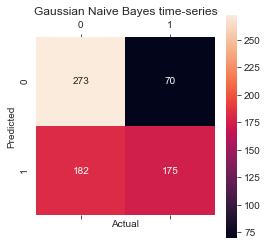

In [59]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train);
y_pred_gnb = model_gnb.predict(X_test)
print( accuracy_score(y_test,y_pred_gnb))
print( precision_score(y_test,y_pred_gnb))
print( recall_score(y_test,y_pred_gnb))

confmat = confusion_matrix(y_test,y_pred_gnb)
plt.matshow(confmat)
sn.heatmap(confmat,annot=True, annot_kws={"size":10}, fmt='d')
plt.title("Gaussian Naive Bayes time-series")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.savefig("Long_lead_Gaussian Naive Bayes time-series")

0.6214285714285714
0.7473118279569892
0.38935574229691877


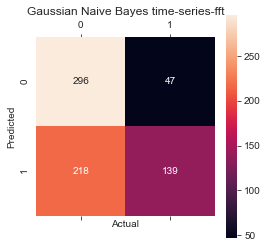

In [60]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_fft_train, y_fft_train);
y_fft_pred_gnb = model_gnb.predict(X_fft_test)
print( accuracy_score(y_fft_test,y_fft_pred_gnb))
print( precision_score(y_fft_test,y_fft_pred_gnb))
print( recall_score(y_fft_test,y_fft_pred_gnb))

confmat = confusion_matrix(y_fft_test,y_fft_pred_gnb)
plt.matshow(confmat)
sn.heatmap(confmat,annot=True, annot_kws={"size":10}, fmt='d')
plt.title("Gaussian Naive Bayes time-series-fft")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.savefig("Long_lead_Gaussian Naive Bayes time-series-fft")

# Logistic Regression

0.78
0.7664041994750657
0.8179271708683473


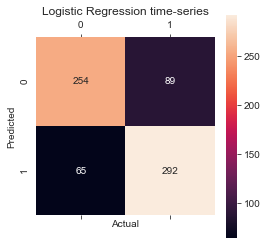

In [61]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_train,y_train)
y_pred_log_reg = log_reg.predict(X_test)
print( accuracy_score(y_test,y_pred_log_reg))
print( precision_score(y_test,y_pred_log_reg))
print( recall_score(y_test,y_pred_log_reg))

confmat = confusion_matrix(y_test,y_pred_log_reg)
plt.matshow(confmat)
sn.heatmap(confmat,annot=True, annot_kws={"size":10}, fmt='d')
plt.title("Logistic Regression time-series")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.savefig("Long_lead_Logistic Regression time-series")

0.8114285714285714
0.783375314861461
0.8711484593837535


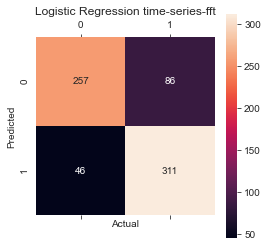

In [62]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_fft_train[:,:],y_fft_train)
y_fft_pred_log_reg = log_reg.predict(X_fft_test[:,:])
print( accuracy_score(y_fft_test,y_fft_pred_log_reg))
print( precision_score(y_fft_test,y_fft_pred_log_reg))
print( recall_score(y_fft_test,y_fft_pred_log_reg))

confmat = confusion_matrix(y_fft_test,y_fft_pred_log_reg)
plt.matshow(confmat)
sn.heatmap(confmat,annot=True, annot_kws={"size":10}, fmt='d')
plt.title("Logistic Regression time-series-fft")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.savefig("Long_lead_Logistic Regression time-series-fft")